In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\Project of Ml\Fake News Detection\News.csv')
data.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
data.shape

(44919, 6)

In [7]:
data.isnull().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   class       44919 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [11]:
data.value_counts('class')

class
0    23502
1    21417
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

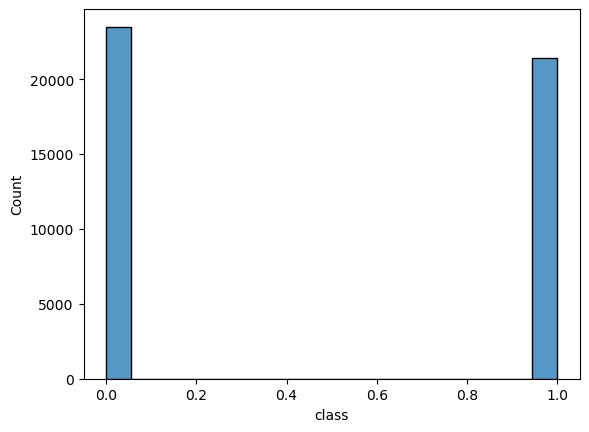

In [20]:
sns.histplot(data['class'])


In [30]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [29]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [ ]:
data = data.drop(["title", "subject","date"], axis = 1)


In [32]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 847.9 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00


In [33]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) # loai bo cac tu khong phai la chu, so va khoang trang
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text

In [36]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review

  0%|          | 0/44919 [00:00<?, ?it/s]

100%|██████████| 44919/44919 [1:10:40<00:00, 10.59it/s]


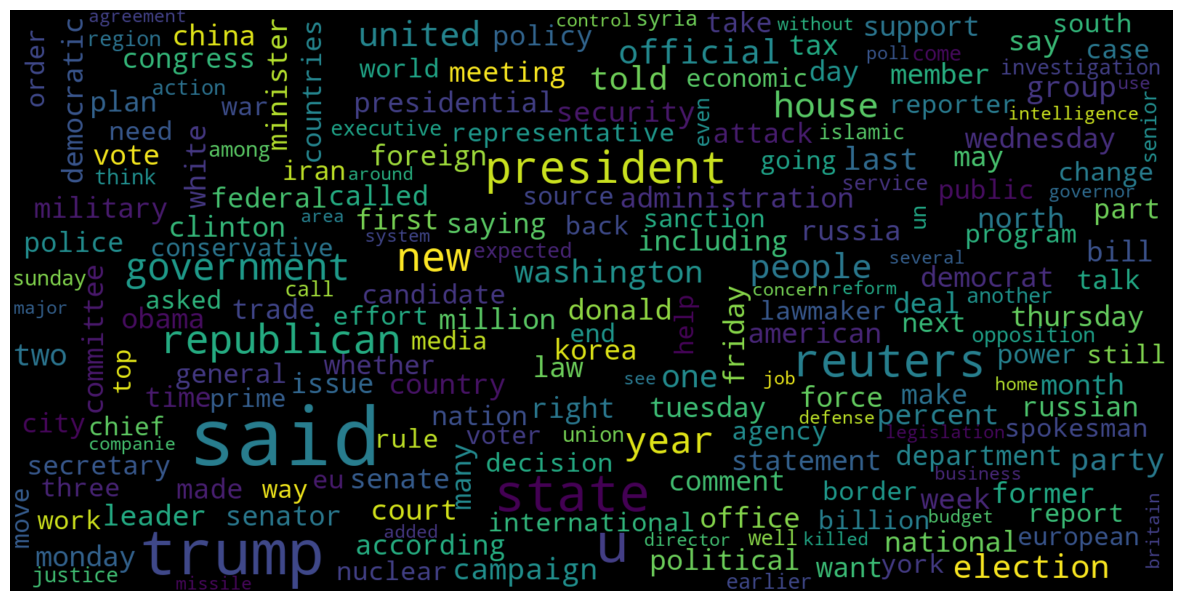

In [37]:
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [38]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
  
x_train, x_test, y_train, y_test = train_test_split(data['text'],  
                                                    data['class'],  
                                                    test_size=0.25)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression 
  
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9935290450889014
0.9881567230632236
